In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib widget


from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from syd import Viewer

from vrAnalysis2.database import get_database
from vrAnalysis2.helpers import Timer, color_violins
from vrAnalysis2.sessions import create_b2session
from vrAnalysis2.processors.spkmaps import SpkmapProcessor
from vrAnalysis2.tracking import Tracker
from vrAnalysis2.syd.reliability_viewers import ReliabilityTrajectory, ReliabilitySingleSession

def make_processor(mouse_name, date, session_id, spks_type="significant"):
    session = create_b2session(mouse_name, date, session_id, dict(spks_type=spks_type))
    spkmap_processor = SpkmapProcessor(session)
    return spkmap_processor

sessiondb = get_database('vrSessions')
mousedb = get_database('vrMice')

tracked_mice = mousedb.get_table(trackerExists=True)["mouseName"].unique()

In [4]:
rv = ReliabilityViewer(tracked_mice).deploy(env="notebook")

100%|██████████| 7/7 [00:01<00:00,  4.10it/s]


100%|██████████| 7/7 [00:00<00:00, 47.29it/s]


100%|██████████| 7/7 [00:00<00:00, 47.76it/s]


100%|██████████| 7/7 [00:00<00:00, 46.38it/s]


100%|██████████| 7/7 [00:00<00:00, 46.67it/s]


In [3]:
xx = rv._reliability[1]["CR_Hippocannula7"]

In [5]:
rv.trackers["CR_Hippocannula7"]

Tracker(mouse_name=CR_Hippocannula7, num_planes=5, num_sessions=7)

In [5]:
smp = SpkmapProcessor(rv.trackers["CR_Hippocannula6"].sessions[-2])

In [12]:
reliability = smp.get_reliability()
print(smp.params)
print(reliability.values.shape)

SpkmapParams(
    dist_step=1.0,
    speed_threshold=1.0,
    speed_max_allowed=inf,
    full_trial_flexibility=3.0,
    standardize_spks=True,
    smooth_width=1.0,
    reliability_method='leave_one_out',
    autosave=False
)
(2, 4958)


In [41]:
maps = smp.get_raw_maps()
maps

Maps(num_trials=83, num_positions=245, num_rois=245, rois_first=False)

In [42]:

idx_each_environment = [smp._filter_environments(env) for env in smp.session.environments]
print([sum(i) for i in idx_each_environment])


[20, 63]


[(4958, 243), (4958, 243)]


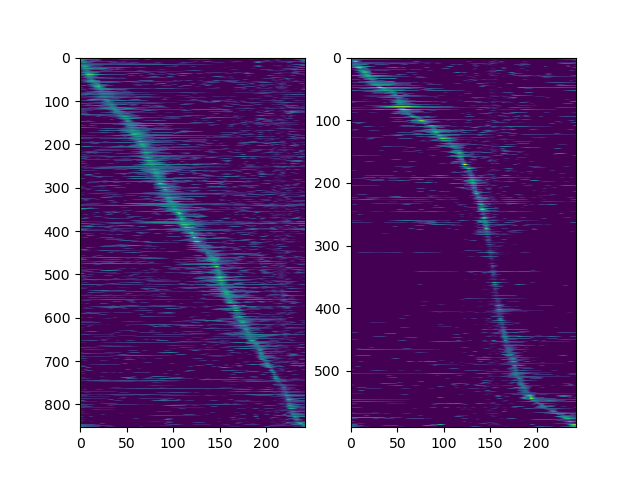

In [62]:
env_maps = smp.get_env_maps(use_session_filters=True)
env_maps.pop_nan_positions()
env_maps.average_trials()
print([s.shape for s in env_maps.spkmap])
reliability = smp.get_reliability(use_session_filters=True)

fig, ax = plt.subplots(1, len(reliability.environments))
for i, env in enumerate(reliability.environments):
    ikeep = reliability.values[i] > 0.1
    ipf = np.argmax(env_maps.spkmap[i][ikeep], axis=1)
    isort = np.argsort(ipf)
    ax[i].imshow(env_maps.spkmap[i][ikeep][isort], interpolation="none", aspect="auto")
plt.show()


In [45]:
e2 = maps.spkmap[idx_each_environment[1]]
print(e2.shape)

(63, 245, 16814)


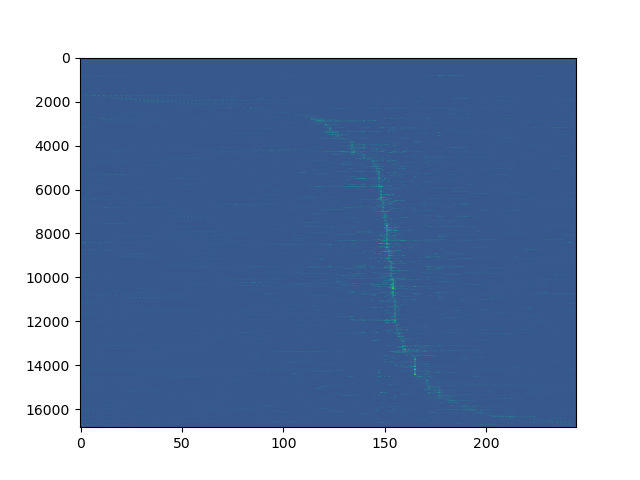

In [46]:
ae2 = np.nanmean(e2, axis=0)
ii = np.argmax(ae2, axis=0)
isort = np.argsort(ii)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(ae2[:, isort].T, interpolation="none", aspect="auto")
plt.show()